In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
df = pd.read_csv('salaries.csv' )
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
df.isna().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [5]:
inputs = df.drop('salary_more_then_100k', axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [15]:
data= df['salary_more_then_100k']
data.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
inputs['company_n']= le.fit_transform(inputs['company'])
inputs['job_n']= le.fit_transform(inputs['job'])
inputs['degree_n']= le.fit_transform(inputs['degree'])

In [11]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [14]:
inputs_name = inputs.drop(['company','job','degree'] , axis='columns')
inputs_name.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [23]:
from sklearn import tree
dt= tree.DecisionTreeClassifier()

In [18]:
from sklearn.model_selection import train_test_split as tts


In [19]:
X_train,X_test,y_train,y_test = tts(inputs_name, data,test_size=0.3)


In [20]:
len(X_train)

11

In [21]:
len(y_test)

5

In [35]:
len(X_test)

5

In [24]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
dt.predict(X_test)

array([1, 1, 0, 1, 0], dtype=int64)

In [27]:
print(y_test)

2     1
13    1
9     1
4     0
0     0
Name: salary_more_then_100k, dtype: int64


In [28]:
dt.score(X_test,y_test)

0.6

ValueError: x and y must be the same size

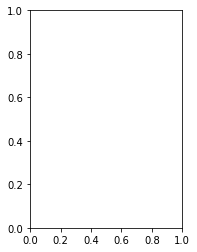